In [21]:
#연습
import tensorflow as tf
import numpy as np

data = np.loadtxt("Blood_fat.csv", delimiter=",")

x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]

w1 = tf.Variable(tf.random.uniform([1], 0, 10, dtype=tf.float64 ,seed=0))
w2 = tf.Variable(tf.random.uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.uniform([1], 0, 100, dtype=tf.float64, seed=0))

def hypothesis(w1, w2, b):
    return w1*x1 + w2*x2 + b

def cost(w1, w2, b):
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(w1, w2, b) - y_data)))

opt = tf.keras.optimizers.SGD(learning_rate=0.001)

epoch = 10001
for i in range(epoch):
    with tf.GradientTape() as tape:
        loss = cost(w1, w2, b)
    gradients = tape.gradient(loss, [w1, w2, b])
    opt.apply_gradients(zip(gradients, [w1, w2, b]))
    if i % 100 == 0:
        print(i, f'{loss.numpy()}, {w1.numpy()}, {w2.numpy()}, {b.numpy()}')

dw1 = w1.numpy()
dw2 = w2.numpy()
db = b.numpy()

calc_y = []
for i in range(len(x1)):
    new_y = (dw1 * x1[i]) + (dw2 * x2[i]) + db
    calc_y.append(new_y.item())
    print(new_y.item())

0 64.05295525544923, [0.90561357], [5.34391978], [82.95658643]
100 41.40349994939151, [0.41332349], [5.10076161], [82.94946835]
200 41.396747721119, [0.40048896], [5.12319282], [82.94909138]
300 41.39289234555054, [0.39079242], [5.14014182], [82.94872351]
400 41.39069116146041, [0.38346745], [5.1529475], [82.94836255]
500 41.389434325940194, [0.37793449], [5.16262238], [82.94800681]
600 41.388716522322895, [0.3737555], [5.16993181], [82.94765503]
700 41.388306370796954, [0.37059941], [5.17545413], [82.94730624]
800 41.38807180303212, [0.3682161], [5.17962635], [82.94695973]
900 41.38793744201394, [0.3664166], [5.18277862], [82.94661493]
1000 41.38786026873834, [0.36505813], [5.18516037], [82.94627144]
1100 41.387815732101366, [0.36403283], [5.18696004], [82.94592894]
1200 41.38778982089553, [0.36325923], [5.18831999], [82.9455872]
1300 41.38777453905067, [0.36267576], [5.18934774], [82.94524603]
1400 41.3877653233024, [0.36223594], [5.19012455], [82.94490531]
1500 41.387759569455696, [

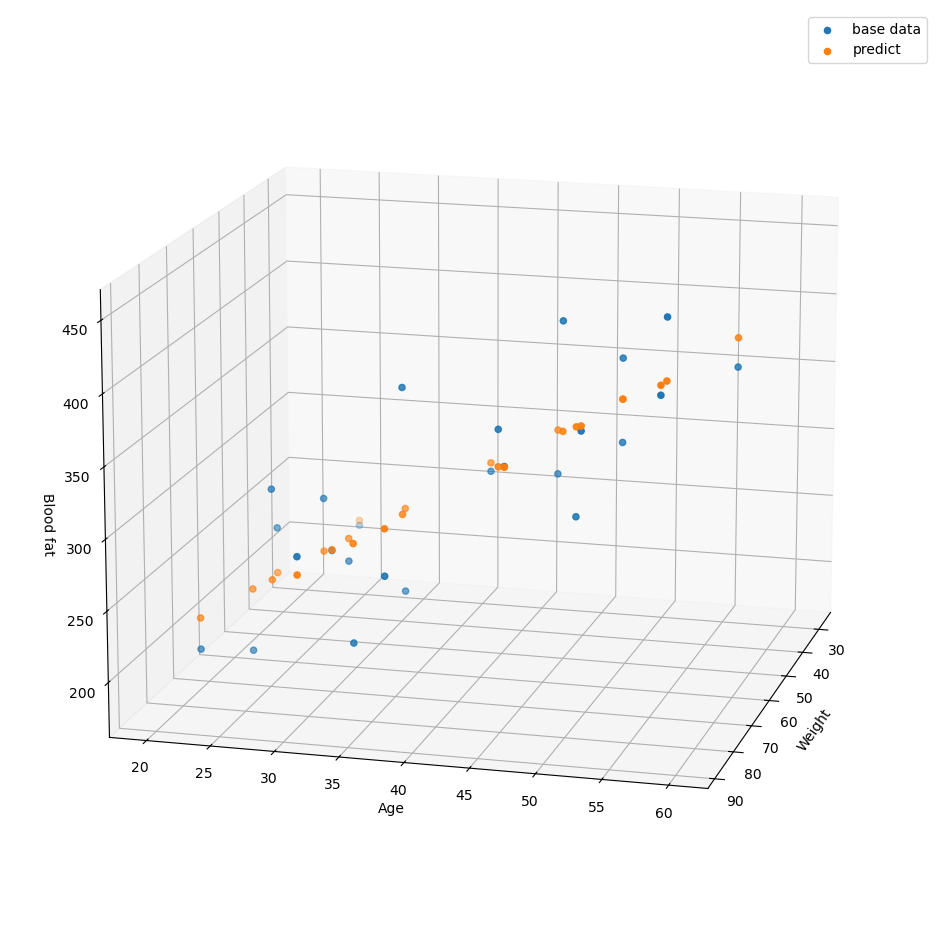

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x1, x2, y_data, 'b', label="base data")
ax.scatter(x1, x2, calc_y, 'r', label="predict")
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.legend()
ax.view_init(15, 15)
plt.show()